### Import libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib
from typing import Tuple, Any, List, Union

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate,
    cross_val_predict,
    GridSearchCV,
)
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    f1_score,
)
from sklearn.utils import shuffle
from joblib import load
import matplotlib.pyplot as plt

import seaborn as sns

from utils.MlPipelineUtils import (
    get_features_data,
    get_dataset,
    get_X_y_data,
    evaluate_model_cm,
    evaluate_model_score
)

### Evaluate best model

In [2]:
# results dir for loading/saving
results_dir = pathlib.Path("results/")

log_reg_model_path = pathlib.Path(f"{results_dir}/1.log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

# load training data from indexes and features dataframe
data_split_path = pathlib.Path("results/0.data_split_indexes.tsv")
features_dataframe_path = pathlib.Path("../1.format_data/data/training_data.csv.gz")

### Evaluate with testing data

In [3]:
features_dataframe = get_features_data(features_dataframe_path)
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)

testing_data = get_dataset(features_dataframe, data_split_indexes, "test")
testing_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
1861,Binuclear,30.0,241.346667,230.146667,LT0027_44,030_58,1,LT0027_44_030_58,LT0027_44/030/58/LT0027_44_030_58.tif,ECT2,...,-0.573941,-0.820014,-0.526834,-0.408275,-0.521341,-0.961038,0.273647,0.778520,-0.394016,-0.766690
1532,Prometaphase,99.0,1314.666667,436.677083,LT0066_19,287_22,1,LT0066_19_287_22,LT0066_19/287/22/LT0066_19_287_22.tif,ch-TOG,...,0.724834,-0.668523,-0.209100,-0.574793,3.519898,-0.406855,-0.071020,-0.731387,1.274607,-1.338288
2871,Prometaphase,152.0,490.000000,973.787500,LT0048_14,335_1,1,LT0048_14_335_1,LT0048_14/335/1/LT0048_14_335_1.tif,PLK1,...,0.920628,-0.529804,1.483451,-0.577654,1.043739,0.336816,-0.303975,-1.033712,0.585853,-0.840794
1949,Polylobed,110.0,685.975309,612.419753,LT0027_44,030_86,1,LT0027_44_030_86,LT0027_44/030/86/LT0027_44_030_86.tif,ECT2,...,0.423555,-0.116250,0.557815,0.283922,0.067576,-1.760011,-0.970680,-0.831678,1.509059,1.001193
193,Polylobed,182.0,133.397260,431.958904,LT0043_48,166_47,1,LT0043_48_166_47,LT0043_48/166/47/LT0043_48_166_47.tif,OGG1,...,-0.896344,-0.153691,0.629466,-0.345324,0.040642,-0.871065,-0.356631,0.182716,-2.093855,0.193557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,Binuclear,82.0,690.144578,532.506024,LT0047_27,140_68,1,LT0047_27_140_68,LT0047_27/140/68/LT0047_27_140_68.tif,DNCH1,...,0.209759,-0.589350,-0.572986,0.193948,-0.377132,0.367718,6.762081,0.551534,-0.462422,-0.416739
1488,Grape,132.0,1118.217949,317.410256,LT0066_19,287_93,1,LT0066_19_287_93,LT0066_19/287/93/LT0066_19_287_93.tif,ch-TOG,...,0.642127,-0.602781,-0.333000,-0.594861,0.135936,0.845754,-1.109703,-1.529153,-0.788269,2.249496
3292,Polylobed,273.0,750.717647,931.011765,LT0157_04,005_78,1,LT0157_04_005_78,LT0157_04/005/78/LT0157_04_005_78.tif,ENSG00000175216,...,-0.315715,-0.125931,0.429016,0.817517,-0.351425,-1.054683,0.097828,-0.074618,-0.994463,0.232435
2983,Polylobed,48.0,519.940476,270.833333,LT0098_13,021_21,1,LT0098_13_021_21,LT0098_13/021/21/LT0098_13_021_21.tif,ENSG00000110675,...,0.671648,-0.548061,-0.179147,-0.430100,-0.417291,-0.727433,0.276425,0.593493,0.127817,-0.283417


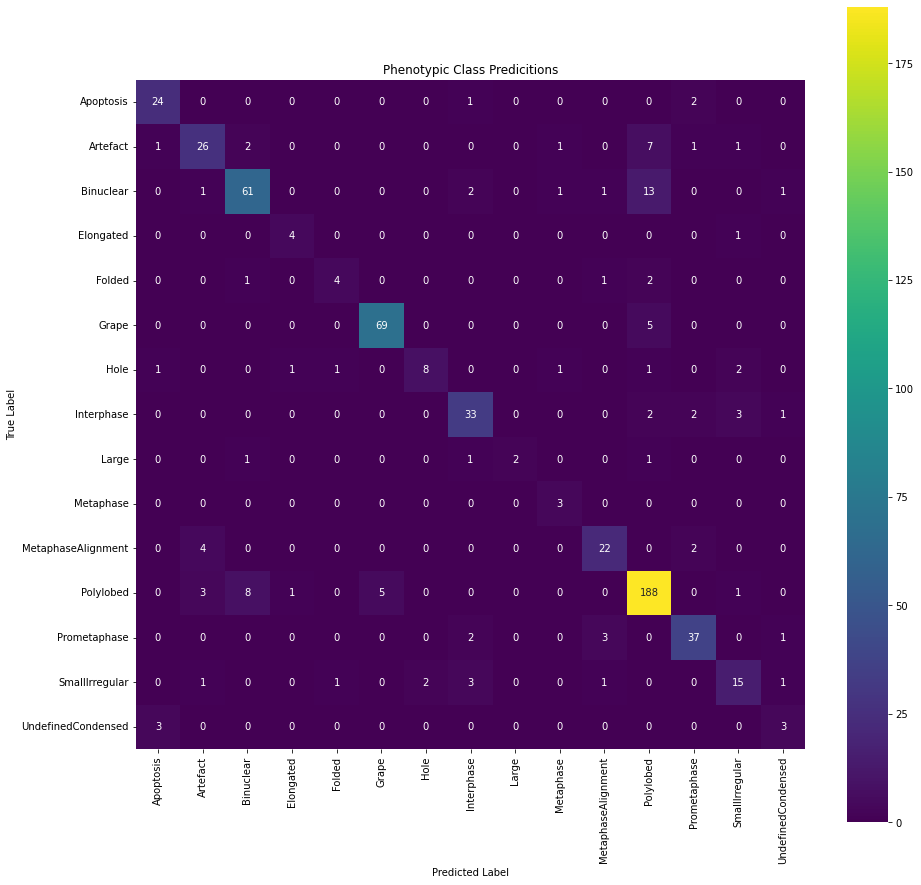

In [4]:
evaluate_model_cm(log_reg_model, testing_data)

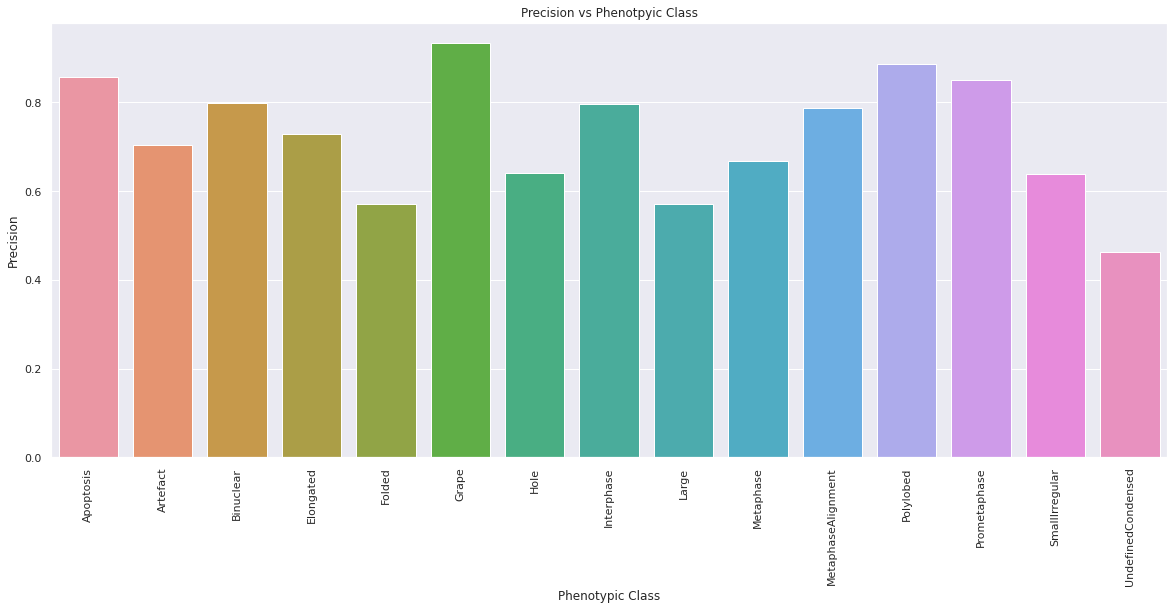

In [5]:
evaluate_model_score(log_reg_model, testing_data)

### Evaluate with holdout data

In [6]:
holdout_data = get_dataset(features_dataframe, data_split_indexes, "holdout")
X_holdout, y_holdout = get_X_y_data(holdout_data)
holdout_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
674,SmallIrregular,48.0,630.758065,202.354839,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,0.389081,0.065198,-0.343256,0.236143,0.209176,0.260897,0.612188,-0.013132,-0.025225,2.161076
679,SmallIrregular,92.0,744.358025,335.703704,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,-0.982763,3.694569,-0.478552,0.147297,0.290459,0.540579,0.236525,0.182654,-0.653987,2.068226
680,SmallIrregular,109.0,771.328947,380.302632,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,-1.153945,0.531941,-1.261145,-0.497467,1.106569,-0.264424,-0.394235,0.292357,-1.455229,1.538125
681,SmallIrregular,114.0,982.866667,400.120000,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,-0.992404,0.623856,0.465564,-0.289329,1.530763,-0.596233,-0.498740,0.546696,0.774504,1.606204
682,UndefinedCondensed,129.0,793.867925,441.056604,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,-0.513004,0.989208,-0.797074,-0.984831,0.815934,-0.043977,0.244709,0.897651,-1.150318,1.517273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,Polylobed,161.0,572.000000,665.526882,LT0023_04,005_72,1,LT0023_04_005_72,LT0023_04/005/72/LT0023_04_005_72.tif,MYST1,...,0.566324,-0.756251,0.404259,-0.944043,0.815236,-0.241202,-0.862862,-0.475562,0.292104,-0.587670
791,Polylobed,161.0,545.604938,672.777778,LT0023_04,005_72,1,LT0023_04_005_72,LT0023_04/005/72/LT0023_04_005_72.tif,MYST1,...,0.016118,-0.958166,0.102561,-0.919212,0.553668,-0.158311,-1.364111,-0.842621,-0.209952,-0.444297
792,Polylobed,148.0,340.634615,677.942308,LT0023_04,005_72,1,LT0023_04_005_72,LT0023_04/005/72/LT0023_04_005_72.tif,MYST1,...,-1.607949,1.287222,-0.623064,0.558888,0.652617,0.103398,-0.063701,-0.248156,-1.123649,0.296646
793,Polylobed,161.0,575.715909,682.829545,LT0023_04,005_72,1,LT0023_04_005_72,LT0023_04/005/72/LT0023_04_005_72.tif,MYST1,...,0.129889,-0.616493,0.002598,-0.965870,-0.275303,-0.344053,-1.025765,-0.772327,0.045996,0.332153


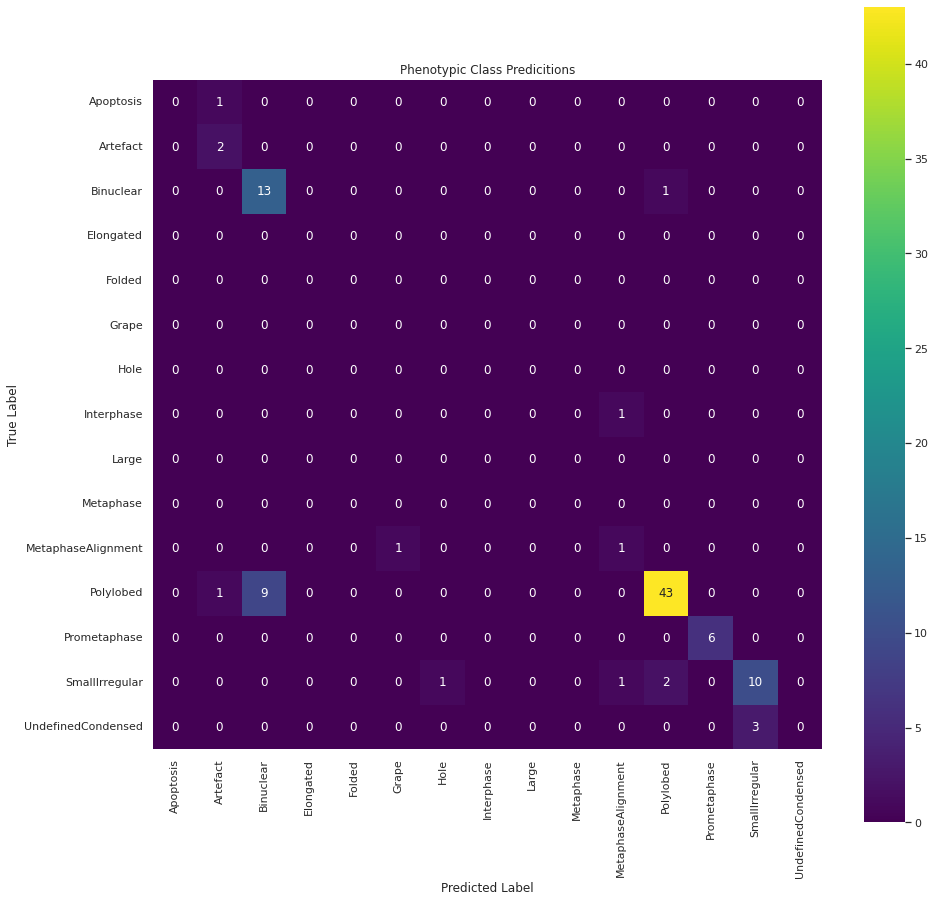

In [7]:
evaluate_model_cm(log_reg_model, holdout_data)

In [8]:
evaluate_model_score(log_reg_model, holdout_data)

ValueError: Length mismatch: Expected axis has 11 elements, new values have 8 elements

### Evaluate with training data

In [ ]:
training_data = get_training_data(features_dataframe, data_split_indexes)
X_training, y_training = get_X_y_data(training_data)
training_data

In [ ]:
y_training_pred = log_reg_model.predict(X_training)
conf_mat = confusion_matrix(y_training, y_training_pred, labels=log_reg_model.classes_)

conf_mat = pd.DataFrame(conf_mat)
conf_mat.columns = log_reg_model.classes_
conf_mat.index = log_reg_model.classes_

# display confusion matrix
plt.figure(figsize=(15, 15))
ax = sns.heatmap(data=conf_mat, annot=True, fmt=".0f", cmap="viridis", square=True)
ax = plt.xlabel("Predicted Label")
ax = plt.ylabel("True Label")
ax = plt.title("Phenotypic Class Predicitions")

In [ ]:
# display precision vs phenotypic class bar chart
precisions = f1_score(y_training, y_training_pred, average=None)
precisions = pd.DataFrame(precisions).T
precisions.columns = np.unique(y_training_pred) #cant use log_reg_model.classes_ because classes may be missing due to lack of data

sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Precision")
plt.title("Precision vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=precisions)

### Save trained model predicitions

In [ ]:
predictions = []
predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions.append(y_training)
predictions.append(y_training_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_test", "y_test_pred", "y_holdout", "y_holdout_pred", "y_training", "y_training_pred"]
predictions.to_csv(f"{results_dir}/model_predictions.tsv", sep="\t")

### Evaluate shuffled baseline model

In [ ]:
log_reg_model_path = pathlib.Path(f"{results_dir}/shuffled_baseline_log_reg_model.joblib")
log_reg_model = load(log_reg_model_path) 

### Evaluate with testing data

In [ ]:
# load training data from indexes and features dataframe
data_split_path = pathlib.Path("results/data_split_indexes.tsv")
features_dataframe_path = pathlib.Path("../1.format_data/data/training_data.csv.gz")

features_dataframe = get_features_data(features_dataframe_path)
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)

testing_data = get_testing_data(features_dataframe, data_split_indexes)
X_test, y_test = get_X_y_data(testing_data)
testing_data

In [ ]:
y_test_pred = log_reg_model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred, labels=log_reg_model.classes_)

conf_mat = pd.DataFrame(conf_mat)
conf_mat.columns = log_reg_model.classes_
conf_mat.index = log_reg_model.classes_

# display confusion matrix
plt.figure(figsize=(15, 15))
ax = sns.heatmap(data=conf_mat, annot=True, fmt=".0f", cmap="viridis", square=True)
ax = plt.xlabel("Predicted Label")
ax = plt.ylabel("True Label")
ax = plt.title("Phenotypic Class Predicitions")

In [ ]:
# display precision vs phenotypic class bar chart
precisions = precision_score(y_test, y_test_pred, average=None)
precisions = pd.DataFrame(precisions).T
precisions.columns = np.unique(y_test_pred) #cant use log_reg_model.classes_ because classes may be missing due to lack of data

sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Precision")
plt.title("Precision vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=precisions)

In [ ]:
np.unique(y_test)

### Evaluate with holdout data

In [ ]:
holdout_data = get_holdout_data(features_dataframe, data_split_indexes)
X_holdout, y_holdout = get_X_y_data(holdout_data)
holdout_data

In [ ]:
y_holdout_pred = log_reg_model.predict(X_holdout)
conf_mat = confusion_matrix(y_holdout, y_holdout_pred, labels=log_reg_model.classes_)

conf_mat = pd.DataFrame(conf_mat)
conf_mat.columns = log_reg_model.classes_
conf_mat.index = log_reg_model.classes_

# display confusion matrix
plt.figure(figsize=(15, 15))
ax = sns.heatmap(data=conf_mat, annot=True, fmt=".0f", cmap="viridis", square=True)
ax = plt.xlabel("Predicted Label")
ax = plt.ylabel("True Label")
ax = plt.title("Phenotypic Class Predicitions")

In [ ]:
# display precision vs phenotypic class bar chart
precisions = precision_score(y_holdout, y_holdout_pred, average=None)
precisions = pd.DataFrame(precisions).T
precisions.columns = np.unique(y_holdout_pred) #cant use log_reg_model.classes_ because classes may be missing due to lack of data

sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Precision")
plt.title("Precision vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=precisions)

### Evaluate with training data

In [ ]:
training_data = get_training_data(features_dataframe, data_split_indexes)
X_training, y_training = get_X_y_data(training_data)
training_data

In [ ]:
y_training_pred = log_reg_model.predict(X_training)
conf_mat = confusion_matrix(y_training, y_training_pred, labels=log_reg_model.classes_)

conf_mat = pd.DataFrame(conf_mat)
conf_mat.columns = log_reg_model.classes_
conf_mat.index = log_reg_model.classes_

# display confusion matrix
plt.figure(figsize=(15, 15))
ax = sns.heatmap(data=conf_mat, annot=True, fmt=".0f", cmap="viridis", square=True)
ax = plt.xlabel("Predicted Label")
ax = plt.ylabel("True Label")
ax = plt.title("Phenotypic Class Predicitions")

In [ ]:
# display precision vs phenotypic class bar chart
precisions = precision_score(y_training, y_training_pred, average=None)
precisions = pd.DataFrame(precisions).T
precisions.columns = np.unique(y_training_pred) #cant use log_reg_model.classes_ because classes may be missing due to lack of data

sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Precision")
plt.title("Precision vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=precisions)

### Save trained model predicitions

In [ ]:
predictions = []
predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions.append(y_training)
predictions.append(y_training_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_test", "y_test_pred", "y_holdout", "y_holdout_pred", "y_training", "y_training_pred"]
predictions.to_csv(f"{results_dir}/shuffled_baseline_model_predictions.tsv", sep="\t")